In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [3]:
cleaned_train_review = pd.read_csv('caches/cleaned_train_reviews_wordlist_nostopwords.csv', header=0, quoting=3)

In [4]:
vectorizer = CountVectorizer(analyzer='word', tokenizer=None, preprocessor=None, stop_words=None, max_features=5000)

In [5]:
train_set_features = vectorizer.fit_transform(cleaned_train_review['review']).toarray()
train_set_labels = cleaned_train_review['sentiment']

In [6]:
n_samples, n_features = train_set_features.shape
n_samples

25000

In [7]:
train_set_labels.shape

(25000,)

In [8]:
vocab = vectorizer.get_feature_names()
vocab[:10]

['abandoned',
 'abc',
 'abilities',
 'ability',
 'able',
 'abraham',
 'absence',
 'absent',
 'absolute',
 'absolutely']

In [9]:
dist = np.sum(train_set_features, axis=0)

In [10]:
for tag, count in list(zip(vocab, dist))[:10]:
    print(tag, count)

abandoned 187
abc 125
abilities 108
ability 454
able 1259
abraham 85
absence 116
absent 83
absolute 352
absolutely 1485


In [11]:
rf = RandomForestClassifier(n_estimators=100)

In [12]:
gnb = GaussianNB()

In [13]:
lr = LogisticRegression()

In [14]:
from roc_plot import roc_plot

1th fold done
2th fold done
3th fold done
4th fold done
5th fold done


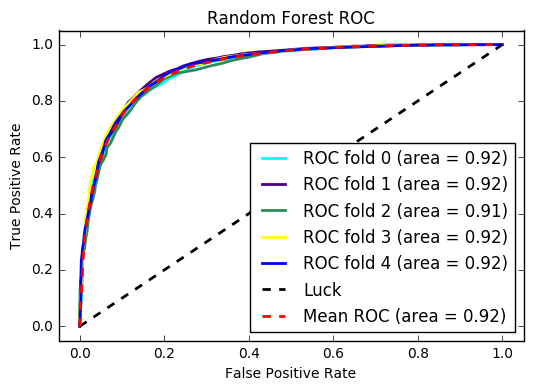

In [15]:
rf_fpr, rf_tpr = roc_plot(classifier=rf, X=train_set_features, y=train_set_labels, plot_title="Random Forest ROC")

1th fold done
2th fold done
3th fold done
4th fold done
5th fold done


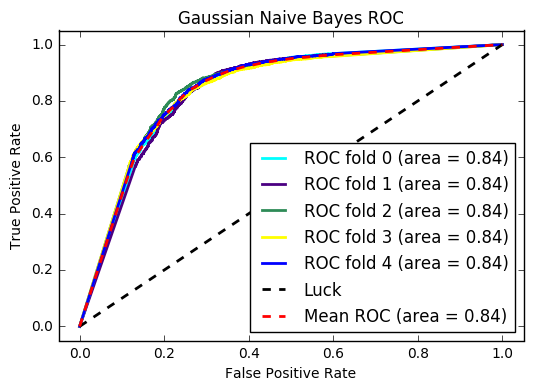

In [16]:
gnb_fpr, gnb_tpr = roc_plot(classifier=gnb, X=train_set_features, y=train_set_labels, plot_title="Gaussian Naive Bayes ROC")

1th fold done
2th fold done
3th fold done
4th fold done
5th fold done


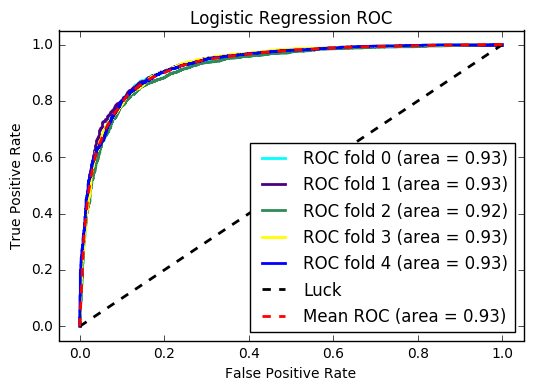

In [17]:
lr_fpr, lr_tpr = roc_plot(classifier=lr, X=train_set_features, y=train_set_labels, plot_title="Logistic Regression ROC")

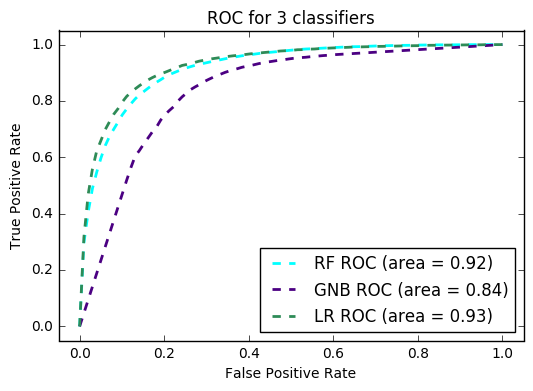

In [18]:
from sklearn.metrics import auc
plt.plot(rf_fpr, rf_tpr, color='cyan', linestyle='--',
          label='RF ROC (area = %0.2f)' %  auc(rf_fpr, rf_tpr), lw=2)
plt.plot(gnb_fpr, gnb_tpr, color='indigo', linestyle='--',
          label='GNB ROC (area = %0.2f)' %  auc(gnb_fpr, gnb_tpr), lw=2)
plt.plot(lr_fpr, lr_tpr, color='seagreen', linestyle='--',
          label='LR ROC (area = %0.2f)' %  auc(lr_fpr, lr_tpr), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC for 3 classifiers")
plt.legend(loc="lower right")
plt.show()